# The Oscars

Dalton Hahn (2762306)

## Shakespearean Play Data

https://www.kaggle.com/kingburrito666/shakespeare-plays/download

## Data Visualization and Storytelling

### "What is the ratio/trend in 'airtime' that Shakespeare gives to men vs. women?"

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev

In [2]:
df = pd.read_csv("../data/processed/genders.csv")

In [3]:
df.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year,Gender
0,0,37,Henry IV,2.0,1.1.34,WESTMORELAND,"My liege, this haste was hot in question,",1597,0
1,1,38,Henry IV,2.0,1.1.35,WESTMORELAND,And many limits of the charge set down,1597,0
2,2,39,Henry IV,2.0,1.1.36,WESTMORELAND,But yesternight: when all athwart there came,1597,0
3,3,40,Henry IV,2.0,1.1.37,WESTMORELAND,"A post from Wales loaden with heavy news,",1597,0
4,4,41,Henry IV,2.0,1.1.38,WESTMORELAND,"Whose worst was, that the noble Mortimer,",1597,0


### Important Notes
* Gender column (0 = Male, 1 = Female)

In [4]:
unique_plays = df["Play"].unique()
print(unique_plays)

['Henry IV' 'Henry VI Part 3' 'Henry V' 'Merry Wives of Windsor'
 'Richard II' 'Henry VIII' 'Taming of the Shrew' 'Henry VI Part 2'
 'Richard III' 'Henry VI Part 1' 'Antony and Cleopatra' 'Coriolanus'
 'Cymbeline' 'Hamlet' 'King John' 'Julius Caesar' 'King Lear' 'macbeth'
 'Measure for measure' 'Much Ado about nothing' 'Othello' 'Pericles'
 'Timon of Athens' 'Titus Andronicus' 'As you like it'
 'Troilus and Cressida' 'Twelfth Night' 'A Winters Tale'
 'Romeo and Juliet' 'The Tempest' 'Merchant of Venice'
 'Alls well that ends well' 'A Midsummer nights dream'
 'Two Gentlemen of Verona' 'Loves Labours Lost' 'A Comedy of Errors']


In [5]:
# NOTE, in my gender_word_counts dictionary, the tuple of counts will be (MALE, FEMALE)
gender_word_counts = dict.fromkeys(unique_plays, (0,0))

for index,row in df.iterrows():
    if row["Gender"] == 0:
        gen_tuple = gender_word_counts.get(row["Play"])
        new_male_val = gen_tuple[0] + len(row["PlayerLine"].split())
        fin_tuple = (new_male_val, gen_tuple[1])
    else:
        gen_tuple = gender_word_counts.get(row["Play"])
        new_female_val = gen_tuple[1] + len(row["PlayerLine"].split())
        fin_tuple = (gen_tuple[0], new_female_val)
    
    gender_word_counts[row["Play"]] = fin_tuple

In [6]:
print(gender_word_counts)

{'Henry IV': (13351, 412), 'Henry VI Part 3': (11199, 0), 'Henry V': (10868, 2201), 'Merry Wives of Windsor': (9724, 0), 'Richard II': (2666, 911), 'Henry VIII': (9948, 693), 'Taming of the Shrew': (17145, 646), 'Henry VI Part 2': (17030, 0), 'Richard III': (13645, 0), 'Henry VI Part 1': (13894, 253), 'Antony and Cleopatra': (5212, 5707), 'Coriolanus': (15395, 3008), 'Cymbeline': (14789, 5593), 'Hamlet': (17872, 1178), 'King John': (8918, 2112), 'Julius Caesar': (15740, 720), 'King Lear': (14904, 3671), 'macbeth': (12546, 181), 'Measure for measure': (10308, 3556), 'Much Ado about nothing': (12336, 4247), 'Othello': (20015, 4819), 'Pericles': (12053, 3517), 'Timon of Athens': (12691, 48), 'Titus Andronicus': (8949, 2579), 'As you like it': (9948, 7950), 'Troilus and Cressida': (22701, 2657), 'Twelfth Night': (7715, 6079), 'A Winters Tale': (15531, 5183), 'Romeo and Juliet': (11767, 6581), 'The Tempest': (14755, 910), 'Merchant of Venice': (12587, 6009), 'Alls well that ends well': (100

In [7]:
# INSPIRATION: https://python-graph-gallery.com/11-grouped-barplot/

# set width of bar
barWidth = 0.4
 
# set height of bar
male_bars = []
female_bars = []

for key,val in gender_word_counts.items():
    male_bars.append(val[0])
    female_bars.append(val[1])
    
print(male_bars)
print(female_bars)

[13351, 11199, 10868, 9724, 2666, 9948, 17145, 17030, 13645, 13894, 5212, 15395, 14789, 17872, 8918, 15740, 14904, 12546, 10308, 12336, 20015, 12053, 12691, 8949, 9948, 22701, 7715, 15531, 11767, 14755, 12587, 10019, 8902, 10146, 7831, 759]
[412, 0, 2201, 0, 911, 693, 646, 0, 0, 253, 5707, 3008, 5593, 1178, 2112, 720, 3671, 181, 3556, 4247, 4819, 3517, 48, 2579, 7950, 2657, 6079, 5183, 6581, 910, 6009, 7357, 4501, 2982, 3939, 2959]


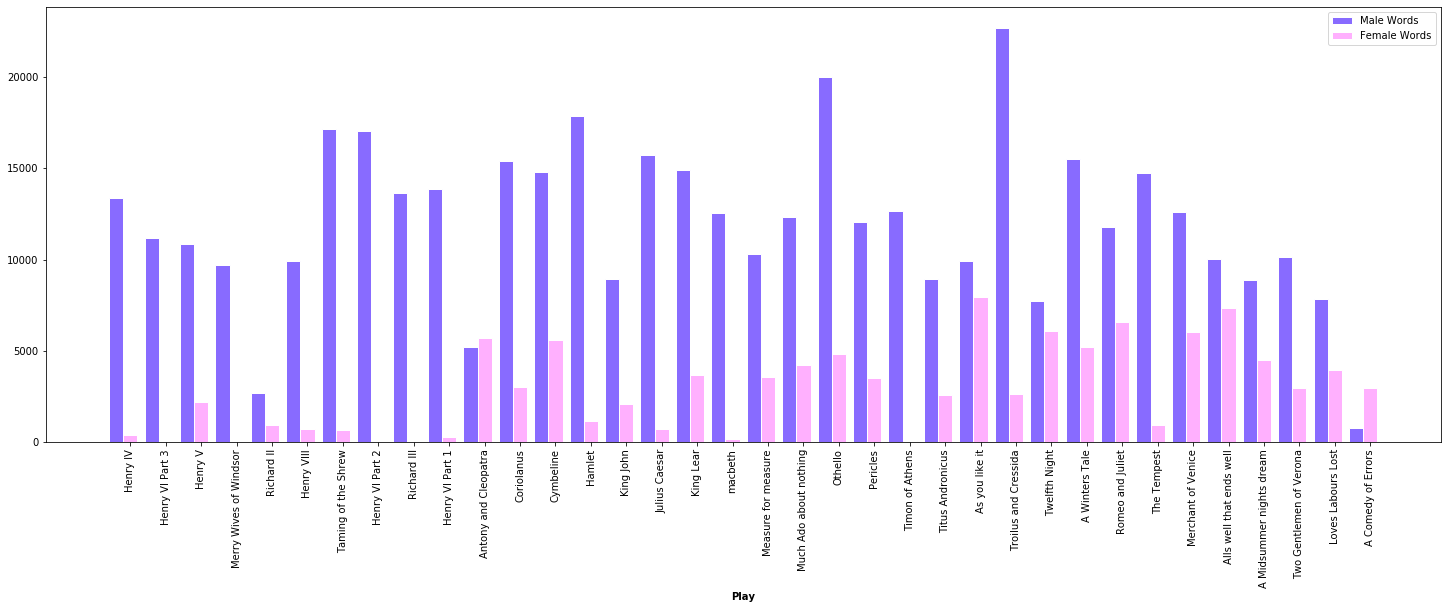

In [8]:
 
# Set position of bar on X axis
r1 = np.arange(len(male_bars))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(25,8))
plt.bar(r1, male_bars, color='#886bff', width=barWidth, edgecolor='white', label='Male Words')
plt.bar(r2, female_bars, color='#ffb0fe', width=barWidth, edgecolor='white', label='Female Words')
 
# Add xticks on the middle of the group bars
plt.xlabel('Play', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male_bars))], list(gender_word_counts.keys()), rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()

# Conclusion

**Caveat**: Only had gender data for some characters in some of the plays

I think this bar chart turned out pretty good even though there was quite a bit of missing data.  I also think that some of the results are fairly surprising given the time that many of these plays were written.  For example, "A Comedy of Errors" seems to have a surprising number of female lines in the play, along with "As You Like It" having near comparable female lines to male lines.  Also, "Romeo and Juliet" confirms my initial thoughts on distribution for that play.